In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
file_path = '/content/drive/My Drive/Thyroid_Cancer.csv'
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
# Basic data overview
print("\nDataset Shape:", df.shape)
print("\nData Summary:")
print(df.describe(include='all'))


Dataset Shape: (383, 17)

Data Summary:
               Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
count   383.000000    383     383        383             383              383   
unique         NaN      2       2          2               2                5   
top            NaN      F      No         No              No        Euthyroid   
freq           NaN    312     334        355             376              332   
mean     40.866841    NaN     NaN        NaN             NaN              NaN   
std      15.134494    NaN     NaN        NaN             NaN              NaN   
min      15.000000    NaN     NaN        NaN             NaN              NaN   
25%      29.000000    NaN     NaN        NaN             NaN              NaN   
50%      37.000000    NaN     NaN        NaN             NaN              NaN   
75%      51.000000    NaN     NaN        NaN             NaN              NaN   
max      82.000000    NaN     NaN        NaN             NaN        

<ipython-input-6-5104a72764a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recurred', data=df, palette='Set2')


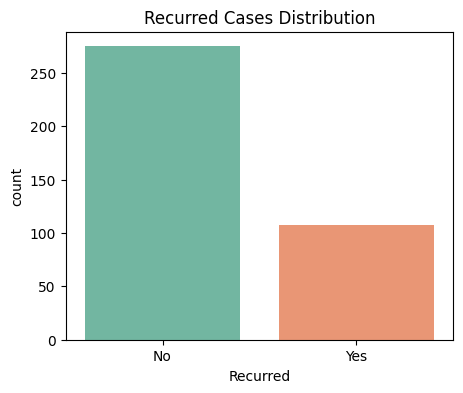

In [6]:
# Check for class imbalance in target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='Recurred', data=df, palette='Set2')
plt.title('Recurred Cases Distribution')
plt.show()

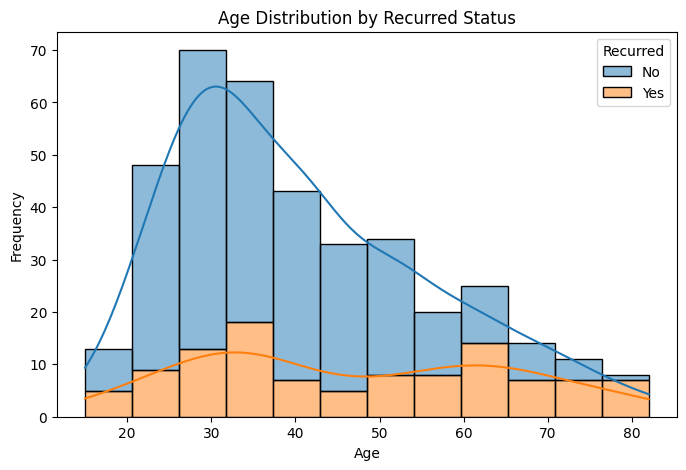

In [7]:
# Plot age distribution across recurrence cases
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Recurred', multiple='stack', kde=True)
plt.title('Age Distribution by Recurred Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Data Preprocessing: Encoding categorical variables
categorical_columns = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
                       'Thyroid Function', 'Physical Examination', 'Adenopathy',
                       'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [14]:
# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store each encoder for reference

In [15]:
# Scaling numerical features
numerical_columns = ['Age']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [16]:
# Display preprocessed data sample
print("\nSample of Preprocessed Data:")
print(df.head(10))


Sample of Preprocessed Data:
        Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0 -0.917439       0        0           0                0                 2   
1 -0.454315       0        0           1                0                 2   
2 -0.718957       0        0           0                0                 2   
3  1.398184       0        0           0                0                 2   
4  1.398184       0        0           0                0                 2   
5  0.736577       1        1           0                0                 2   
6  0.008810       0        0           1                0                 0   
7  0.339613       0        0           0                0                 2   
8  0.670416       0        0           0                0                 2   
9 -0.057351       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3  

In [17]:
# Split data into features and target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [18]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)